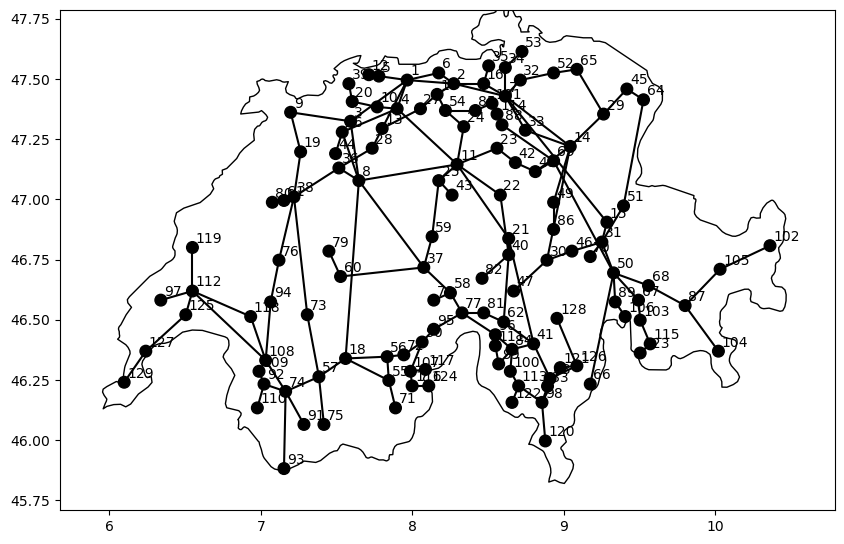

In [29]:
using DelimitedFiles, PyPlot, LinearAlgebra, Graphs

include("tools.jl")

buses = readdlm("buses.csv",',')
lines = readdlm("lines.csv",',')
gens = readdlm("generators.csv",',')

rm_ids = [243,247,575]

ids = Int64[] # Indices
names = String[] # Noms
x = Float64[] # Coordonnées horizontales
y = Float64[] # Coordonnées verticales
for i in 2:length(buses[:,1])
        if buses[i,6] == "CH" && !(buses[i,1] in rm_ids)
                push!(ids,Int64(buses[i,1]))
                push!(names,String(buses[i,2]))
                push!(x,Float64(buses[i,8]))
                push!(y,Float64(buses[i,9]))
        end
end

i2n = Dict{Int64,Int64}() # Renvoie la numérotationa associée à l'indice d'un sommet
i2x = Dict{Int64,Float64}() # Coordonnée horizontale associée à un indice de sommet
i2y = Dict{Int64,Float64}() # Coordonnée verticale associée à un indice de sommet
namr = String[] # Nom des sommets dans l'ordre de numérotation et sans redondance
X = Float64[] # Coordonnées horizontales dans l'ordre de numérotation et sans redondance
Y = Float64[] # Coordonnées verticales dans l'ordre de numérotation et sans redondance
k = 0
for i in 1:length(ids)
        id = ids[i]
        if !(id in keys(i2n))
                global k += 1
                i2n[id] = k
                i2x[id] = x[i]
                i2y[id] = y[i]
                push!(namr,names[i][1:end-4])
                push!(X,x[i])
                push!(Y,y[i])
                for j in i+1:length(ids)
                        if x[i] == x[j] && y[i] == y[j]
                                i2n[ids[j]] = k
                                i2x[ids[j]] = x[i]
                                i2y[ids[j]] = y[i]
                        end
                end
        end
end

ls = zeros(0,4)
for i in 2:length(lines[:,1])
        if (lines[i,1] in ids) && (lines[i,2] in ids)
                global ls = [ls;lines[[i,],[1,2,3,4]]]
        end
end

n = length(union(collect(values(i2n)))) # Nombre de sommets

A0 = zeros(n,n) # Matrice d'adjacence (booléenne)
A1 = zeros(n,n) # Matrice d'adjacece pondérée (par la norme de la résistance)

for k in 1:length(ls[:,1])
        l = ls[k,:]
        i = i2n[l[1]]
        j = i2n[l[2]]
        A0[i,j] = 1.
        A0[j,i] = 1.
        A1[i,j] += norm(l[3:4])
        A1[j,i] += norm(l[3:4])
end
# Vecteur des degrés, matrice des degrés et matrice laplacienne (booléen·es)
d0 = vec(sum(A0,dims=1))
D0 = diagm(0 => d0)
L0 = D0 - A0
# Vecteur des degrés, matrice des degrés et matrice laplacienne pondéré·es
d1 = vec(sum(A1,dims=1))
D1 = diagm(0 => d1)
L1 = D1 - A1

g = Graph(A0)

title_dict = Dict{String,String}("bc" => "Betweenness centrality",
                                 "cc" => "Closeness centrality",
                                 "dc" => "Degree centrality",
                                 "de" => "Degree",
                                 "ec" => "Eigenvector centrality",
                                 "pr" => "PageRank",
                                 "rc" => "Radiality centrality",
                                 "sc" => "Stress centrality",
                                 "xxx" => "xxx"
                                 )

yess = ["yes","Yes","YES","Y","y","oui","Oui","OUI","o","O",""]
nos = ["no","No","NO","N","n","non","Non","NON"]
add_edge = "yes"
Add = zeros(n,n)

figure("Suisse",(10,6.5))
plot_ch()
plot_A(A0,X,Y)
δ = [.02,.02]
for i in 1:length(X)
        PyPlot.text(X[i]+δ[1],Y[i]+δ[2],"$i")
end

**Liste des mesures de graphes :**
- 'bc' : Betweenness centrality,
- 'cc' : Closeness centrality,
- 'dc' : Degree centrality,
- 'de' : Degree,
- 'ec' : Eigenvector centrality,
- 'pr' : PageRank,
- 'rc' : Radiality centrality,
- 'sc' : Stress centrality,
- 'xxx' : Annuler et quitter.

*Quelle mesure veux-tu utiliser ?*

In [30]:
measure = "unknown"
while measure == "unknown"
        print("Quelle mesure de graphe veux-tu utiliser ? ")
        global measure = readline()
        if !(measure in keys(title_dict))
#                @info "======================================"
#                @info "CODE INVALIDE !"
#                @info "======================================"
                measure = "unknown"
        end
end

Quelle mesure de graphe veux-tu utiliser ? stdin> ro
Quelle mesure de graphe veux-tu utiliser ? stdin> aa
Quelle mesure de graphe veux-tu utiliser ? stdin> pr


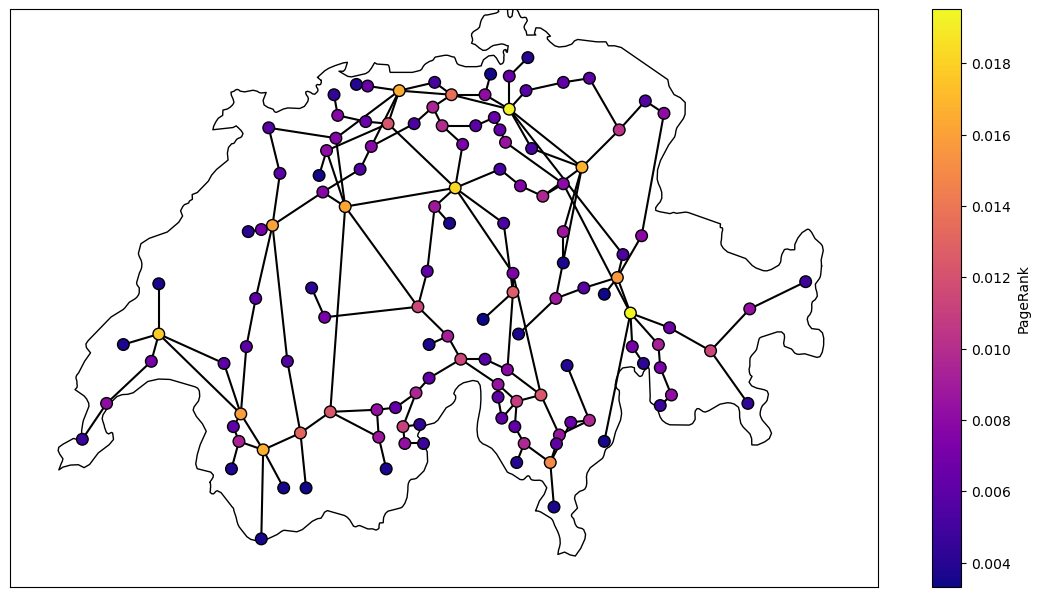

(Any[], Any[])

In [17]:
figure(title_dict[measure],(14,7.5))

v = get_measure(measure,g)

plot_ch()
plot_vscale(A0,X,Y,v,"plasma",cb=true,cbl=title_dict[measure])
        

In [18]:
str,namrk,valrk,numrk = get_list(v,namr,10)
@info "======================================"
@info "Les $(length(namrk)) sommets avec les plus grandes valeurs :"
@info "======================================"
for i in 1:length(namrk)
        @info "$(numrk[i]) "*namrk[i]*" : $(round(valrk[i],sigdigits=2))"
end
@info "======================================"

[ Info: ======================================
[ Info: Les 10 sommets avec les plus grandes valeurs :
[ Info: ======================================
[ Info: 50 Sils : 0.02
[ Info: 7 Breite : 0.019
[ Info: 11 Mettlen : 0.018
[ Info: 112 Romanel : 0.018
[ Info: 14 Grynau : 0.017
[ Info: 74 Riddes : 0.017
[ Info: 1 Laufenburg : 0.016
[ Info: 8 Bickigen : 0.016
[ Info: 38 Muhleberg : 0.016
[ Info: 108 St. Triphon : 0.016
[ Info: ======================================


Numéro du premier sommet : stdin> 75
Numéro du second sommet : stdin> 71


[ Info: ======================================
[ Info: Les 10 sommets avec les plus grandes valeurs :
[ Info: ======================================
[ Info: 50 Sils : 0.02
[ Info: 7 Breite : 0.019
[ Info: 11 Mettlen : 0.018
[ Info: 112 Romanel : 0.018
[ Info: 14 Grynau : 0.017
[ Info: 74 Riddes : 0.016
[ Info: 1 Bickigen : 0.016
[ Info: 8 Laufenburg : 0.016
[ Info: 38 Muhleberg : 0.016
[ Info: 108 St. Triphon : 0.016
[ Info: ======================================


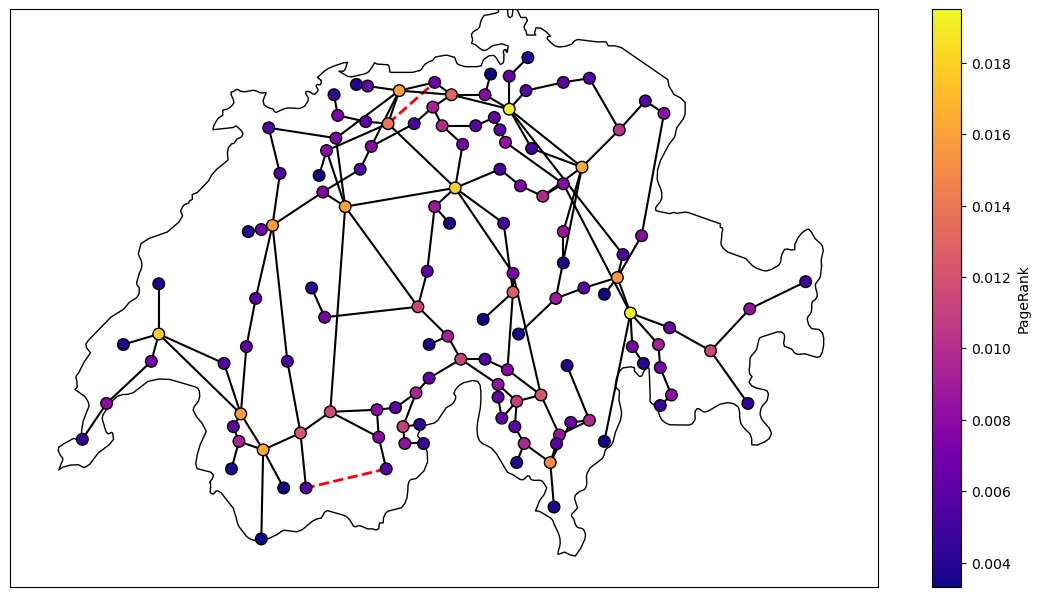

In [32]:
    print("Numéro du premier sommet : ")
    i = parse(Int64,readline())
    print("Numéro du second sommet : ")
    j = parse(Int64,readline())
    if i == j
        @info "Une ligne électrique ne peut pas relier un sommet à lui-même."
    else
        Add[[i,j],[i,j]] += [0. 1.;1. 0.]
        h = Graph(A0+Add)

        figure("re-"*title_dict[measure],(14,7.5))
        clf()
        figure("re-"*title_dict[measure],(14,7.5))

        w = get_measure(measure,h)

        plot_ch()
        plot_vscale(A0,Add,X,Y,w,"plasma",cb=true,cbl=title_dict[measure])
        str,namrk,valrk = get_list(w,namr,10)
        @info "======================================"
        @info "Les $(length(namrk)) sommets avec les plus grandes valeurs :"
        @info "======================================"
        for i in 1:length(namrk)
            @info "$(numrk[i]) "*namrk[i]*" : $(round(valrk[i],sigdigits=2))"
        end
        @info "======================================"
    end
#    global add_edge = "???"
#    while !(add_edge in union(yess,nos))
#        print("Veux-tu ajouter une arête ? ([oui]/non) ")
#        global add_edge = readline()
#    end


In [ ]:
if measure == "xxx"
        @info "======================================"
        @info "Interrompu..."
end

close("all")